In [2]:
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'number': 3,
 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'},
  {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
  {'craft': 'ISS', 'name': 'Ivan Vagner'}],
 'message': 'success'}

In [33]:
import requests
r = requests.get(url='http://api.open-notify.org/iss-now.json')
r.json()

{'timestamp': 1598387137,
 'iss_position': {'longitude': '-66.1353', 'latitude': '-33.1233'},
 'message': 'success'}

In [46]:
import requests
import json

req = requests.get("http://api.open-notify.org/iss-now.json")
response = req.json

obj = json.loads(r.text)
print(obj)

print (obj['timestamp'])
print (obj['iss_position']['latitude'], obj['iss_position']['latitude'])
print( 'The ISS current location at {%s} is LAT: {%s}, LONG: {%s}'%(obj['timestamp'], obj['iss_position']['latitude'], obj['iss_position']['latitude']))
print(now)


{'timestamp': 1598387137, 'iss_position': {'longitude': '-66.1353', 'latitude': '-33.1233'}, 'message': 'success'}
1598387137
-33.1233 -33.1233
The ISS current location at {1598387137} is LAT: {-33.1233}, LONG: {-33.1233}
<built-in method now of type object at 0x10a0f8648>


In [24]:
# get international space station geo location
# http://open-notify.org/Open-Notify-API/ISS-Location-Now/

def get_space_station_location():
    r = requests.get(url='http://api.open-notify.org/iss-now.json')
    space_station_location = (r.json())


    space_station_longitude = float(space_station_location['iss_position']['longitude'])
    print('space_station_longitude', space_station_longitude)
    space_station_latitude = float(space_station_location['iss_position']['latitude'])
    print('space_station_latitude', space_station_latitude)
    
    return (space_station_longitude, space_station_latitude)

In [32]:
import datetime
now = datetime.datetime.now
lon, lat = get_space_station_location()
print( 'The ISS current location at {} is LAT: {}, LONG: {}'.format(datetime.datetime.now, lat, lon))


space_station_longitude -80.8601
space_station_latitude -18.1217
The ISS current location at <built-in method now of type object at 0x10a0f8648> is LAT: -18.1217, LONG: -80.8601
<built-in method now of type object at 0x10a0f8648>


In [7]:
conda install -c conda-forge cartopy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/veeranki/opt/anaconda3

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         146 KB  conda-forge
    cartopy-0.18.0             |   py37hc4b8d57_0         1.7 MB
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    conda-4.8.4                |   py37hc8dfbb8_2         3.0 MB  conda-forge
    geos-3.8.0                 |       h4a8c4bd_1         898 KB  conda-forge
    libcxx-10.0.1              |       h5f48129_0         1.0 MB  conda-forge
    openssl-1.1.1g             |       haf1e3a3_1         1.9 MB  conda-forge

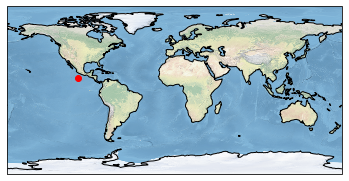

In [26]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat, color='red')
ax.coastlines()
ax.stock_img()

In [30]:
BASE_URL = "http://api.open-notify.org/"
lat = 38
lon = -86
url = (BASE_URL + "iss-pass.json?lat={}&lon={}").format(lat, lon)
response = requests.get(url)
content = response.json()

content

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1598449478,
  'latitude': 38.0,
  'longitude': -86.0,
  'passes': 5},
 'response': [{'duration': 533, 'risetime': 1598451884},
  {'duration': 639, 'risetime': 1598457685},
  {'duration': 606, 'risetime': 1598463501},
  {'duration': 619, 'risetime': 1598517814},
  {'duration': 632, 'risetime': 1598523611}]}

In [31]:
 for overhead in content['response']:
            ts = overhead['risetime']
            duration = overhead['duration']
            time = overhead['risetime']
            
duration , time

(632, 1598523611)

In [32]:
from datetime import datetime, timezone
local_datetime_converted = datetime.fromtimestamp(time)
local_datetime_converted

datetime.datetime(2020, 8, 27, 6, 20, 11)

In [35]:
print('The ISS will be overhead Lattitude: %s, Longitude:%s at time:%s for duration(sec):%s' %(lat,lon, time, duration))

The ISS will be overhead Lattitude: 38, Longitude:-86 at time:1598523611 for duration(sec):632
